# Fashion MNIST

**Pérez Angeles Adrián **

El objetivo de este proyecto es clasificar distintas prendas a partir de la base de datos de keras https://keras.io/api/datasets/fashion_mnist/ (Fashion MNIST) utilizando one-hot encoding.
Se implemento una red neuronal de convolución con 6 filtros con un flaten y varias capas densas en cada una de estas se vario el dropout.

Se manejaron 70,000 imagenes de las cuales 10,000 son para test y 70,000 son para entrenamiento divididos en las siguientes etiquetas 
0.-	T-shirt/top
1.-	Trouser
2.-	Pullover
3.-	Dress
4.-	Coat
5.-	Sandal
6.-	Shirt
7.-	Sneaker
8.-	Bag
9.-	Ankle boot

Se obtuvo que para los datos de test:
Loss = 0.33
Accuracy = 0.88

Parte de la consecuencia de esta presición es debida a que la maquina no pudo distinguir en su mayoria de T-shirt/top y Shirt

Importamos librerias

In [ ]:
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
#from keras.utils import plot_model
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
import keras.backend as K
from keras.layers import BatchNormalization                       
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import tensorflow as tf

import pickle
import gzip
import numpy as np

np.random.seed(1)
%matplotlib inline

### Descargamos los datos de fashion MNIST de KERAS y asignamos los valores de train y test

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

### Observamos que los datos no están normalizados. Normalizamos los datos

In [ ]:
train_x = x_train.astype("float32") / 255
test_x = x_test.astype("float32") / 255

In [ ]:
np.amax(train_x)
np.amax(test_x)

1.0

In [ ]:
x_train = np.expand_dims(x_train, -1) #buscamos que tenga la dimensión (28,28,1)
x_test = np.expand_dims(x_test, -1)
learn_samples=(x_train, y_train)
test_samples=(x_test,y_test)

### Observamos el tipo,longitud y forma de los datos

In [ ]:
print("El tipo de train_samples es: ", type(learn_samples), "con longitud: ", len(learn_samples) )
print("El tipo de test_data: ", type(test_samples), "con longitud: ", len(test_samples) )

El tipo de train_samples es:  <class 'tuple'> con longitud:  2
El tipo de test_data:  <class 'tuple'> con longitud:  2


In [ ]:
print("Shape of the first element of the train_data tuple: ", learn_samples[0].shape)
print("Shape of the second element of the train_data tuple: ", learn_samples[1].shape)
print("Shape of the first element of the test_data tuple: ", test_samples[0].shape)
print("Shape of the second element of the test_data tuple: ", test_samples[1].shape)

Shape of the first element of the train_data tuple:  (60000, 28, 28, 1)
Shape of the second element of the train_data tuple:  (60000,)
Shape of the first element of the test_data tuple:  (10000, 28, 28, 1)
Shape of the second element of the test_data tuple:  (10000,)


In [ ]:
dic = {0: '	T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
       5: 'Sandal', 6: 'Shirt', 7:'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

### Observando una muestra en imagen y en su arreglo


The y value of the first training sample is 7
It correspons to a Sneaker


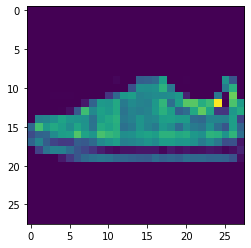

In [ ]:
index = 3500

plt.imshow(train_x[index]);

print("\nThe y value of the first training sample is",np.squeeze(y_train[index]))
print("It correspons to a", dic[int(np.squeeze(y_train[index]))])

In [ ]:
learn_samples[1][::]

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Pasamos los datos de ouput(y_train, y_test) a one-hot enncoding

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train.reshape(-1)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
I=np.eye(10)
I

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
train_y = np.eye(10)[y_train.reshape(-1)]
test_y = np.eye(10)[y_test.reshape(-1)]

In [ ]:
train_y[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

The sample 9 corresponds to a Sandal
Its one-hot representation is = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


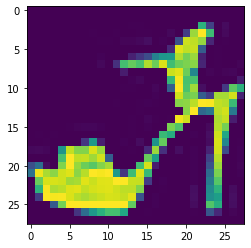

In [ ]:
sample = 9

plt.imshow(train_x[sample]);

print('The sample', sample, 'corresponds to a', dic[int(np.argmax(train_y[sample]))])
print("Its one-hot representation is =", train_y[sample])

In [ ]:
# Escribe el codigo aquí
print("la dimension de train_x es:", x_train.shape, "la dimensión de train_y es: ", y_train.shape,"\n")
print("la dimension de test_x es:", x_test.shape, "la dimensión de test_y es: ", y_test.shape,"\n")

la dimension de train_x es: (60000, 28, 28, 1) la dimensión de train_y es:  (60000,) 

la dimension de test_x es: (10000, 28, 28, 1) la dimensión de test_y es:  (10000,) 



### Implementando una red neuronal de convolución 

In [ ]:
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(6, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
               
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.40))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.50))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_MnistModel-000'))
    
    return model


In [ ]:
one_image = (28, 28,1)
activation='sigmoid'
num_classes=10
dropout=True
batch_normalization=True

Fmnist_model = architecture(one_image,num_classes,activation,dropout,batch_normalization)

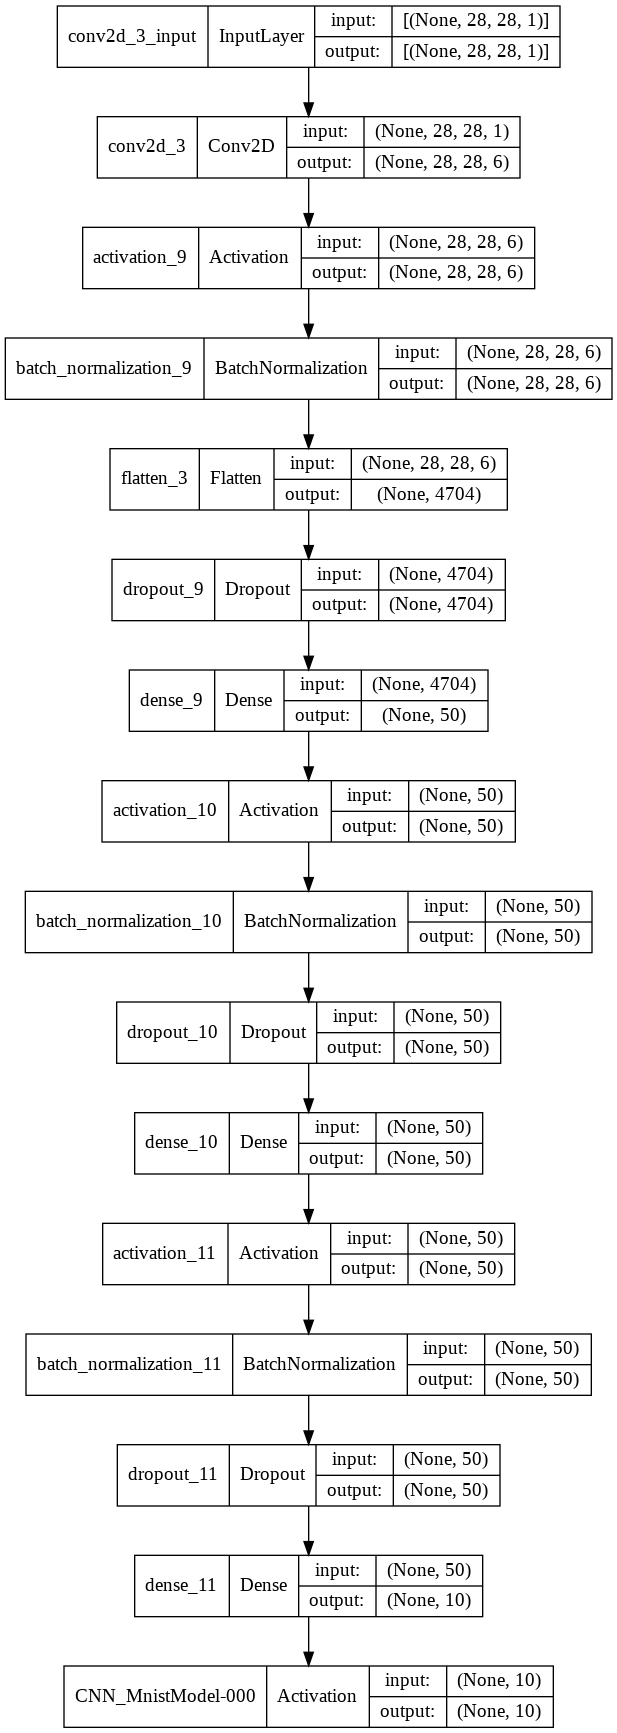

In [ ]:
plot_model(Fmnist_model, to_file='FF_mnist_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
Fmnist_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         60        
                                                                 
 activation_9 (Activation)   (None, 28, 28, 6)         0         
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 6)        24        
 hNormalization)                                                 
                                                                 
 flatten_3 (Flatten)         (None, 4704)              0         
                                                                 
 dropout_9 (Dropout)         (None, 4704)              0         
                                                                 
 dense_9 (Dense)             (None, 50)                235250    
                                                      

In [ ]:
learning_rate = 0.1

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0, nesterov=False)
loss_function ='categorical_crossentropy'
metric_function = 'accuracy'

Fmnist_model.compile(optimizer = optimizer, loss = loss_function, metrics = [metric_function])

In [ ]:
#10 % of the training data will be used to validate the training
start_time = time.time()

validation_portion = 0.2 #sera el conjunto de validación 

In [ ]:
batch_size=100
num_epochs = 100


history = Fmnist_model.fit(x=train_x, y=train_y, epochs=num_epochs, batch_size=batch_size, \
                            validation_split=validation_portion, shuffle=True, verbose=1)

end_time = time.time()
print("Time for learning: {:10.4f}s".format(end_time - start_time))

Epoch 1/100
480/480 [==============================] - 3s 5ms/step - loss: 0.7429 - accuracy: 0.7484 - val_loss: 0.4842 - val_accuracy: 0.8251
Epoch 2/100
480/480 [==============================] - 2s 5ms/step - loss: 0.5673 - accuracy: 0.8079 - val_loss: 0.4308 - val_accuracy: 0.8460
Epoch 3/100
480/480 [==============================] - 2s 5ms/step - loss: 0.5281 - accuracy: 0.8205 - val_loss: 0.4203 - val_accuracy: 0.8505
Epoch 4/100
480/480 [==============================] - 2s 4ms/step - loss: 0.5074 - accuracy: 0.8284 - val_loss: 0.4028 - val_accuracy: 0.8588
Epoch 5/100
480/480 [==============================] - 2s 4ms/step - loss: 0.4873 - accuracy: 0.8352 - val_loss: 0.3896 - val_accuracy: 0.8604
Epoch 6/100
480/480 [==============================] - 2s 4ms/step - loss: 0.4719 - accuracy: 0.8400 - val_loss: 0.3860 - val_accuracy: 0.8621
Epoch 7/100
480/480 [==============================] - 2s 5ms/step - loss: 0.4631 - accuracy: 0.8419 - val_loss: 0.3729 - val_accuracy: 0.8656

### Graficamos la funciones de costo vs epocas

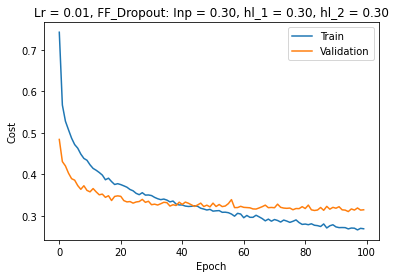

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Lr = 0.01, FF_Dropout: Inp = 0.30, hl_1 = 0.30, hl_2 = 0.30')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Graficamos la presición del modelo respecto a las epocas

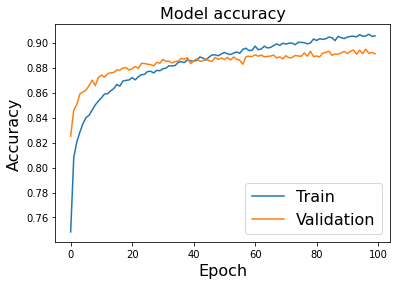

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', size=16)
plt.ylabel('Accuracy', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 16})
plt.show()

In [ ]:
evaluations = Fmnist_model.evaluate(x =test_x, y=test_y)

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))


313/313 [==============================] - 1s 3ms/step - loss: 0.3339 - accuracy: 0.8889
Loss = 0.3338686525821686
Test Accuracy = 0.8888999819755554


### Predicción de imagen

In [ ]:
predictions = Fmnist_model.predict(test_x)
sample1 = 2456
# Predicting the digit associated to the sample 
# np.argmax returns the index of the maximum value

prediction = np.argmax(predictions[sample1])

print('For the sample number', sample1, 'the prediction is the value:', dic[prediction])

For the sample number 2456 the prediction is the value: Ankle boot


For the sample number 2456 the associated value is: Ankle boot


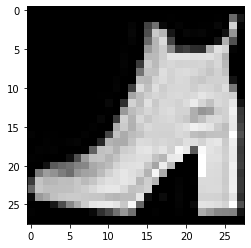

In [ ]:
plt.imshow(test_samples[0][sample1].reshape((28, 28)), cmap='gray')

print ('For the sample number', sample1, 'the associated value is:', dic[int(np.argmax(test_y[sample1]))])